
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. To bulid the analysis around this dataset, one dependent characteristic and four indpendent characteristics have been selected. The dependent characteristic are revenues. The independent characteristics are movies title, gener of the movie, runtime and years.


> Questions:

1. Which movies have the highest revenues?
2. What geners made the highest revenue?
3. How the runtime of a movie affects its revenues?
4. What is the relationship between movie release data and the increase in revenue and buget over the years?

In [2]:
# import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## 2. Data Wrangling


**Data wrangling process will be devided into two parts:** The first one is _Access Data_ where the dataset will be loaded and inspected to recognize datatypes and look for instances of missing or possibly errant data. The second step is _Data Cleaning_ where the data logic is simplified, duplicated values will be removed, missing values will be handled and the irrelavent features will be removed.

### 2.1 Acess Data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#number of rows and columns in the data set
df.shape

(10866, 21)

In [5]:
#no of elements in the data set.
df.size

228186

In [6]:
#inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As shown in the info above, the dataset has 10866 entries and some columns have NaN values. Regarding data type, release_date will be changed from String into datetime. All of these steps will be conducted in Data Cleaning step.

In the code below, I'll get the number of NaN values in each column, then I'll decide what to do with them. 

In [7]:
#get the number of Nan values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see from above the columns which have NaN values are: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. In my analysis, there is no need for homepage, director, tagline, keywords, overview, production_companies, Cast,budget_adj and revenue_adj. so I will just drop them. Then I will delete rows which include NaN values. This is will be conducted in Data Cleaning step.

Now we check for any duplicated records using below code:

In [8]:
#show total duplicated records
sum(df.duplicated())

1

Just one duplicated record has been found. This will be deleted in the code below

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
#ensure there are no duplicaed records
sum(df.duplicated())

0

### 2.2  Data cleaning

After discussing the structure of the data and any issues that need to be cleaned, now I will perform the required cleaning.

**Handling NaN values:** I decided to delete the following columns: homepage, tagline, overview, keywords, production_companies, cast, budget_adj and revenue_adj as there is no need for them in my analysis so I will just drop them. 

In [13]:
#Drop columns: homepage, director, tagline, overview, keywords, production_companies, cast, budget_adj',revenue_adj.
df.drop(['homepage','director','tagline','overview' ,'keywords', 'production_companies', 'cast','budget_adj','revenue_adj'], axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


Then I will delete rows which include NaN values.

In [14]:
df.isnull().sum().any()

True

In [15]:
# Drop rows with any null values
df.dropna(inplace=True)

In [16]:
# checks if any of columns have null values - this code should print False
df.isnull().sum().any()

False

**Handling Data types:** release_date will be changed from String into datetime.

In [17]:
df['release_date']=pd.to_datetime(df['release_date'])
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [18]:
#check the new number of entries
df.shape

(10834, 12)

In [19]:
#check NaN values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10834 non-null  int64         
 1   imdb_id         10834 non-null  object        
 2   popularity      10834 non-null  float64       
 3   budget          10834 non-null  int64         
 4   revenue         10834 non-null  int64         
 5   original_title  10834 non-null  object        
 6   runtime         10834 non-null  int64         
 7   genres          10834 non-null  object        
 8   release_date    10834 non-null  datetime64[ns]
 9   vote_count      10834 non-null  int64         
 10  vote_average    10834 non-null  float64       
 11  release_year    10834 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


As shown above no Null values found and all the data types are correct. 
Now after finishing the Data Cleaning part, we can start working in our analysis to answer the questions easliy.

Below is a printout of histograms of the numerical columns. We can see that there are more movies have been realesed in the recent yaers.

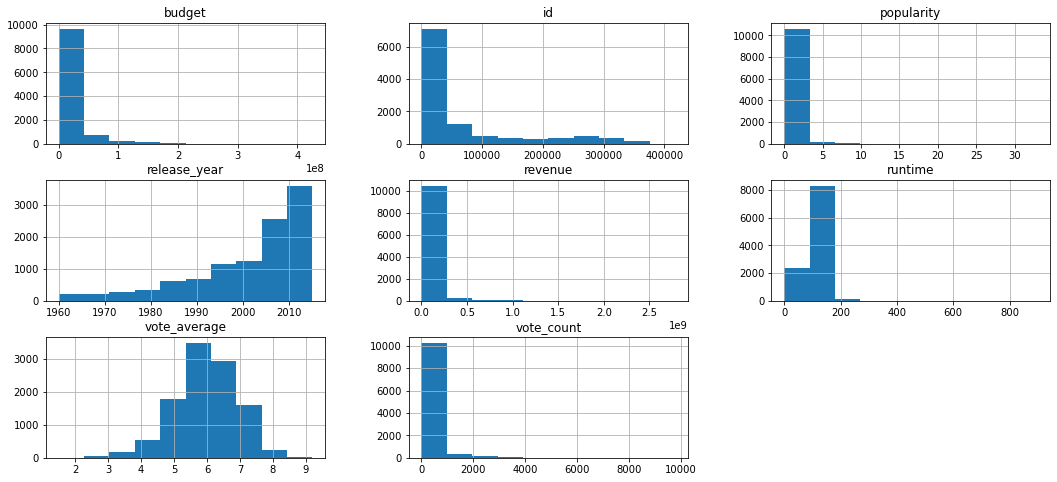

In [20]:
df.hist(figsize=(18,8));

In [21]:
# Statistical values for the cleaned data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10834.000000,10834.000000,1.083400e+04,1.083400e+04,10834.000000,10834.000000,10834.000000,10834.000000
mean,65811.569042,0.647776,1.466613e+07,3.994086e+07,102.162728,217.970833,5.973159,2001.308196
std,91927.169054,1.001316,3.094857e+07,1.171561e+08,31.265059,576.368151,0.933831,12.815839
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10587.250000,0.208387,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20541.500000,0.384587,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75146.000000,0.715767,1.500000e+07,2.417932e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


Here I will start answering the questions mentioned earlier.

### Research Question 1 (Which movies have the  highest revenues?)

In [22]:
#To get the max values in revenue column, we can sort the data set as shown below

heightest_revenue = df.sort_values(['revenue'], ascending = False).head(5)
heightest_revenue

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


The five movies above are the movies with heightest revenue. We can visualize this using below bar chart.

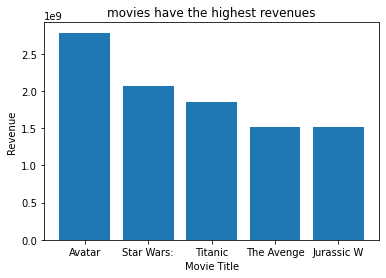

In [23]:
# here I'll plot the bar chart. i'll just takes the first 10 character of each string in the titles list.
titles = heightest_revenue['original_title']
#make the titles shorter
title = [i[0:10] for i in titles]
plt.bar(np.arange(0, 5), heightest_revenue['revenue'], tick_label = title)
plt.title('movies have the highest revenues');
plt.ylabel('Revenue');
plt.xlabel('Movie Title');

### Research Question 2 (What gener made the heighest revenue ?)

Here I'm goining to study how revenue in movie industry has been changing over the years. 

In [24]:
df.genres.nunique()

2037

In [25]:
# Find the sum revenue of genre with groupby
h_genres = df.groupby('genres').revenue.sum()
h_genres

genres
Action                                      2331375459
Action|Adventure                             484253103
Action|Adventure|Animation                           0
Action|Adventure|Animation|Comedy|Drama       16627188
Action|Adventure|Animation|Comedy|Family             0
                                               ...    
Western|Drama|Crime|Romance                    1031243
Western|History                               15795189
Western|History|War                           25819961
Western|Horror|Thriller                              0
Western|Thriller                                  6147
Name: revenue, Length: 2037, dtype: int64

Above are the number of unique genres combination which are 2037 elements along with sum of the revenue for each. Most of the gener contain more that one gener seperated by | sign.
In below code I will create a function to select the strings of some geners and get the sum of revenue for each one.

In [26]:
#define a function to the sum of revenue for each genre 
def revenue_sum(genre):
    
    df_genre = df[df['genres'].str.contains(genre)]
#get sum of revenue for movies that're considered of genre Horror
    sum = df_genre.revenue.sum()
    
    return sum

In below code cells, we'll get the sum of revenue for the following genres: Horror, Action, Drama, Romance and Comedy.Then i'll create a new dataframe to draw a pie chart to compare those values visually.

In [27]:
#create a new data frame; genres_revenue_df
d = {'sum of revenue': [revenue_sum("Horror"), revenue_sum("Action"), revenue_sum("Drama"), revenue_sum("Romance"), revenue_sum("Comedy")]}
genres_revenue_df = pd.DataFrame(data=d, index = ["Horror", "Action", "Drama", "Romance" ,"Comedy"] )
genres_revenue_df.sort_values(['sum of revenue'], ascending = False)
#genres_revenue_df["sum of revenue"].max()

,sum of revenue
Action,173542641094
Comedy,142337036180
Drama,139145537255
Romance,61104656624
Horror,27538937718


Here I'll draw a pie chart for the dataframe above

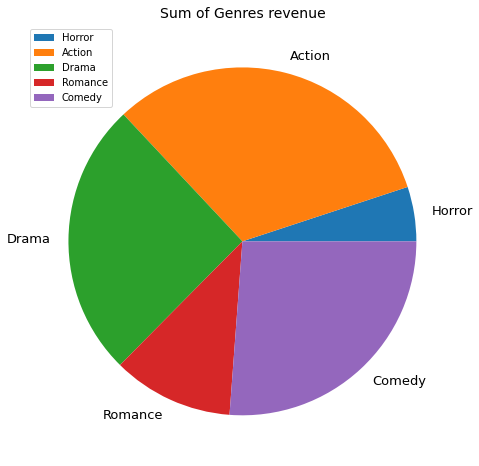

In [28]:
# Plot a pie chart to see what genre made the hight revenue
genres_revenue_df.plot(kind ="pie", figsize =(8,8), fontsize =13, subplots=True)
plt.title('Sum of Genres revenue', fontsize = 14)
plt.ylabel('');

As we can see from the statitics and the pie chart above that the Action movies made the highest revenue among the list of movies in the data set with 173,542,641,094 USD total revenue. In the second place we have Comedy genre with net revenue of 142,337,036,180 USD, then we have Drama, Romance and Horror.

### Research Question 3  (How is the runtime of a movie affects its revenues?)

Here I'm going to disscuss the relationships between the runtime of a movie and its revenue.

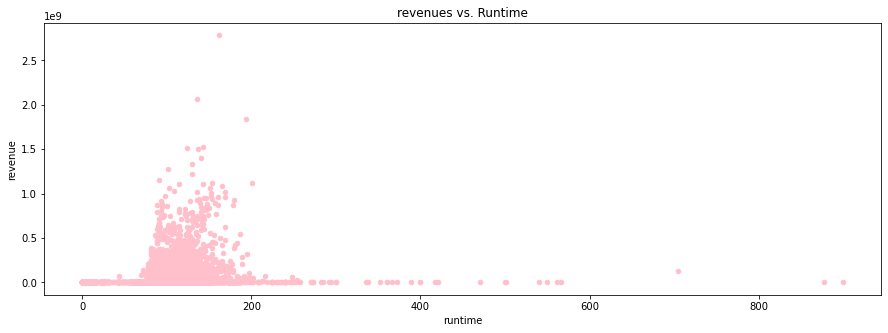

In [29]:
# Plot scatter plot between the movie runtime and revenues.
df.plot(x ='runtime', y ='revenue', kind ='scatter', figsize=(15,5), color='pink')
plt.title('revenues vs. Runtime')
plt.xlabel('runtime')
plt.ylabel('revenue');

From the scatter plot above, we can see that the movies which have runtime in the middle of 0 to 200 minutes interval( slightly more than 100 minutes) usually receive the highest revenue.

Below i'll get the entires that have runtime less that 200 to ensure that our conclsion is correct.

In [30]:
#Get movies with run time less than 200
df_runtime = df[ df["runtime"] <= 200 ]
#sort the dataframe
df_runtime.sort_values(['revenue'], ascending = False).head(5)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


From the dataframe above we can see that the movies with the highest revnues in Q1 are included in the dataframe that has run time more than 100 and less that 200 minutes. These runtimes are not considered short to movies so usually movies with with mid-long runtime made more revenues.

### Research Question 4  (What is the relationship between movie release data and the increase in revenue and buget over the years?)  

Here I'll see how the revenue movies made and budget spent over movies has been changed over the years. This is will give us a visualized picture  how the the economic history of film industry developed starting from 1960 till 2015. 
In the code below I will use a line chart to see the change in revenue and budget over the years.

In [31]:
rev_bud_change = df.groupby('release_year')['revenue', 'budget'].sum()
#budget_change = df.groupby('release_year')['budget'].sum()
rev_bud_change

<ipython-input-31-0a440048121a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rev_bud_change = df.groupby('release_year')['revenue', 'budget'].sum()


,revenue,budget
release_year,,
1960,145005000,22056948
1961,337720188,46137000
1962,215579846,54722126
1963,187404989,73331500
1964,340981782,39483161
1965,458081854,70205115
1966,84736689,57554800
1967,737834637,100652200
1968,264732980,71939000


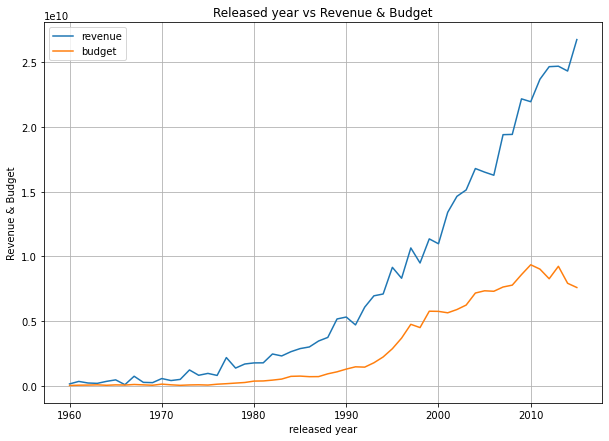

In [32]:
# Plot line chart for Released year vs Revenue & Budget
rev_bud_change.plot(figsize = (10,7), grid=True)
plt.xlabel('released year', fontsize = 10)
plt.ylabel('Revenue & Budget', fontsize = 10)
plt.title('Released year vs Revenue & Budget', fontsize = 12);

We can see from the line chart that both Revenue & Budget has always been increasing. If we analyze the revenue line, we can see that from 1960 till 1970 it was almost that same and comparing to budget line, the profit was negligible. Revenues that movies made start to increase from the mid on 70s and it continued to increase afterward. The big change begins in the first year of the current century in 2000 with total of 10,978,701,012$ for all the movies in our data set. The budget is also increased after 1990 and afterward. Of course there some spikes in both lines in between, but generally the total revenue movies made and the budget spent over them has always been increasing over the years. I think it will always go higher as the movie industry is improving year by year.

<a id='conclusions'></a>
## Conclusions

### Limitation:    
**Before disscussing the final points dervied from the analsis of TMDb movie data. I would like to point out that the the given data set has alot of Null or Nan value, I had to drop them which has an impact on number of records used in the analysis. Other than that, every thing was fine.**

To conclude this investigation report of TMDb movie data set. The data analysis process steps have been performed: First was asking questions then Data Wrangling process where I accessed dataset and  inspected it to recognize datatypes and look for instances of missing or possibly errant data. Then I Cleaned the data by removing duplicated values, handling missing values and removing the irrelavent features. Finally the Exploratory Data Analysis where I start to answer the questions statistically and visually.

Now I would like to present the findings that I came up with after answer the questions:

> **1**: The five movies that made the heightest revenues were: Avatar, Star Wars: The Force Awakens, Titanic, The Avengers then Jurassic World.

> **2**: In question two we can see from the statitics and the pie chart above that the Action movies made the highest revenue among the list of movies in the data set with 173,542,641,094 USD total revenue. In the second place we have Comedy genre with net revenue of 142,337,036,180 USD, then we have Drama, Romance and Horror.

> **3**: In the third question we can see from the scatter plot that the movies which have runtime in the middle of 0 to 200 minutes inereval( slightly more than 100 minutes) usually receive the highest revenue. Also from the new dataframe we can see that the movies with the highest revnues in Q1 are included in the dataframe that has run time more than 100 and less that 200 minutes. These runtimes are not considered short to movies so usually movies with with mid-long runtime made more revenues.

> **4**: In the fourth and the last question, we can see from the line chart that both Revenue & Budget has always been increasing. If we analyze the revenue line, we can see that from 1960 till 1970 it was almost that same and comparing to budget line, the profit was negligible. Revenues that movies made start to increase from the mid on 70s and it continued to increase afterward. The big change begins in the first year of the current century in 2000 with total of 10,978,701,012$ for all the movies in our data set. The budget is also increased after 1990 and afterward. Of course there some spikes in both lines in between, but generally the total revenue movies made and the budget spent over them has always been increasing over the years. I think it will always go higher as the movie industry is improving year by year.

## Sources


**Stackoverflow:** https://stackoverflow.com/questions/38992480/how-to-remove-first-x-characters-from-a-string-in-a-list/38992598![image.png](attachment:image.png)

**Pandas documentation**

**Matplotlib documentation**

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255